In [3]:
!ls ../build/src/

CMakeFiles	     imp.cpython-312-x86_64-linux-gnu.so  libimp.so  Makefile
cmake_install.cmake  knn				  main


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
sys.path.insert(0,'../build/src/')
import imp

In [12]:
help(imp)

Help on module imp:

NAME
    imp - Pybind11 plugin for the Interval Matrix Profile (IMP). There is currently only the STOMP implementation for float and double data. It is parallel

FUNCTIONS
    imp_STOMP_double(...) method of builtins.PyCapsule instance
        imp_STOMP_double(time_series: numpy.ndarray[numpy.float64], window_size: int, period_starts: numpy.ndarray[numpy.int32], interval_length: int, exclude: int) -> tuple[list[float], list[int]]

        Compute the Interval Matrix Profile using the STOMP algorithm. The parameters are as follows:
                time_series: numpy array, the time series data,
                window_size: int, the size of the subsequences,
                period_starts: numpy array, an array with the starting index of each period,
                interval_length: int, the lentgth of the interval (parameter L of the paper),
                exclude: int, the size of the exclusion zone.

            Returns a tuple of two numpy arrays: the Interval Ma

In [26]:
data_path = "../Data/climate_pulse/SST/"
ts_sst = np.load(data_path+"daily_series.npy").astype(np.float64)
date_sst = np.load(data_path+"daily_series_date.npy")

In [20]:
window_size = 7
interval_length = 61
exclude = 7
start_year = np.datetime64(date_sst[0], 'Y').astype(int) + 1970
end_year = np.datetime64(date_sst[-1], 'Y').astype(int) + 1970
period_starts = []
for year in range(start_year, end_year+1):
    period_starts.append(np.where(date_sst == np.datetime64(str(year) + "-01-01"))[0][0])

In [56]:
%%time
output = imp.imp_STOMP_double(ts_sst, window_size, period_starts, interval_length, exclude)
_imp, _id_imp = output 

CPU times: user 608 ms, sys: 0 ns, total: 608 ms
Wall time: 48 ms


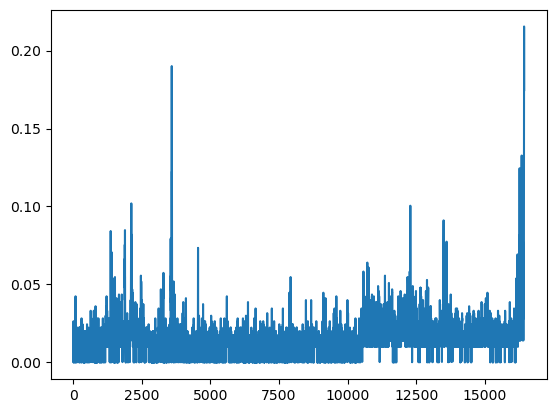

In [31]:
plt.plot(imp)